In [1]:
#load my packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy.io.fits as fits
import h5py
import astroML
%matplotlib inline

# Problem 1: Multivariate Data

In [2]:
#load in data
fits0001 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_00_to_01.fits.gz'
fits0102 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_01_to_02.fits.gz'
fits0203 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_02_to_03.fits.gz'
fits0304 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_03_to_04.fits.gz'
fits2021 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_20_to_21.fits.gz'
fits2122 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_21_to_22.fits.gz'
fits2223 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_22_to_23.fits.gz'
fits2324 = '/Users/patrickaleo/ast596_2020_Spring/homework/PatrickAleo/Data4HW01/HLC.RA_23_to_24.fits.gz'

In [190]:
data0001 = fits.getdata(fits0001)
data0102 = fits.getdata(fits0102)
data0203 = fits.getdata(fits0203)
data0304 = fits.getdata(fits0304)
data2021 = fits.getdata(fits2021)
data2122 = fits.getdata(fits2122)
data2223 = fits.getdata(fits2223)
data2324 = fits.getdata(fits2324)

In [117]:
from astropy.stats import sigma_clip

def ThreePanelPlotGal(fitsfile, name):
    data = fits.getdata(fitsfile)
    
    # galaxy threshold
    datagal = data[data['MEAN_OBJECT_TYPE'] <= 5]
    rcol_gal = datagal['MEAN_PSFMAG'][:,2] #r
    gmi_gal = datagal['MEAN_PSFMAG'][:,1] - datagal['MEAN_PSFMAG'][:,3] #g-i

    #clip outliers
    #gals (galaxies, not ladies)
    clipped_rcol_gal = sigma_clip(rcol_gal, sigma=3)
    clipped_gmi_gal = sigma_clip(gmi_gal, sigma=3)
    RA_gal = datagal['RA_PM'] 
    DEC_gal = datagal['DEC_PM']
    
    fig = plt.figure(figsize=(14, 14))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    plt.suptitle(name)
    
    # Plot the results using the binned_statistic function
    from astroML.stats import binned_statistic_2d
    RA_mean, xedges, yedges = binned_statistic_2d(clipped_rcol_gal, clipped_gmi_gal, RA_gal,
                                               'mean', bins=400)
    DEC_mean, xedges, yedges = binned_statistic_2d(clipped_rcol_gal, clipped_gmi_gal, DEC_gal,
                                               'mean', bins=400)
    # Define custom colormaps: Set pixels with no sources to white
    cmap_RA = plt.cm.Reds
    cmap_RA.set_bad('w', 1.)

    cmap_DEC = plt.cm.Blues
    cmap_DEC.set_bad('w', 1.)
    
    ###
    plt.subplot(2, 2, 1)
    sns.kdeplot(clipped_rcol_gal[::50], ax=ax1, shade=True, label='r, gal')
    sns.kdeplot(clipped_gmi_gal[::50], ax=ax1, shade=True, label='$g-i$, gal')
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    plt.legend()
    
    ###
    plt.subplot(2, 2, 2)
    sns.kdeplot(clipped_rcol_gal[::50], clipped_gmi_gal[::50], ax=ax2, shade=True, 
                cmap='viridis')
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    
    ###
    plt.subplot(2, 2, 3)
    plt.imshow(RA_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    sns.kdeplot(clipped_rcol_gal[::50], clipped_gmi_gal[::50], ax=ax3, shade=False)
    cb = plt.colorbar(ticks=[0, 1],
                  format=r'$10^{%i}$', orientation='horizontal')
    cb.set_label(r'Mean $\mathrm{RA}$')
    plt.clim(0, 1)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    
    ###
    plt.subplot(2, 2, 4)
    plt.imshow(DEC_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    sns.kdeplot(clipped_rcol_gal[::50], clipped_gmi_gal[::50], ax=ax4, shade=False)
    cb = plt.colorbar(ticks=[0, 1],
                  format=r'$10^{%i}$', orientation='horizontal')
    cb.set_label(r'Mean $\mathrm{DEC}$')
    plt.clim(0, 1)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')

In [118]:
from astropy.stats import sigma_clip

def ThreePanelPlotStars(fitsfile, name):
    data = fits.getdata(fitsfile)
    
    # stars threshold
    datastars = data[data['MEAN_OBJECT_TYPE'] >= 5]
    rcol_stars = datastars['MEAN_PSFMAG'][:,2] #r
    gmi_stars = datastars['MEAN_PSFMAG'][:,1] - datastars['MEAN_PSFMAG'][:,3] #g-i

    #clip outliers
    #stars
    clipped_rcol_stars = sigma_clip(rcol_stars, sigma=2)
    clipped_gmi_stars = sigma_clip(gmi_stars, sigma=2)
    RA_stars = datastars['RA_PM'] 
    DEC_stars = datastars['DEC_PM']
    
    fig = plt.figure(figsize=(14, 14))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    plt.suptitle(name)
    
    # Plot the results using the binned_statistic function
    from astroML.stats import binned_statistic_2d
    RA_mean, xedges, yedges = binned_statistic_2d(clipped_rcol_stars, clipped_gmi_stars, RA_stars,
                                               'mean', bins=400)
    DEC_mean, xedges, yedges = binned_statistic_2d(clipped_rcol_stars, clipped_gmi_stars, DEC_stars,
                                               'mean', bins=400)
    # Define custom colormaps: Set pixels with no sources to white
    cmap_RA = plt.cm.Reds
    cmap_RA.set_bad('w', 1.)

    cmap_DEC = plt.cm.Blues
    cmap_DEC.set_bad('w', 1.)
    
    ###
    plt.subplot(2, 2, 1)
    sns.kdeplot(clipped_rcol_stars[::50], ax=ax1, shade=True, label='r, stars')
    sns.kdeplot(clipped_gmi_stars[::50], ax=ax1, shade=True, label='$g-i$, stars')
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    plt.legend()
    
    ###
    plt.subplot(2, 2, 2)
    sns.kdeplot(clipped_rcol_stars[::50], clipped_gmi_stars[::50], ax=ax2, shade=True, 
                cmap='viridis')
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    
    ###
    plt.subplot(2, 2, 3)
    plt.imshow(RA_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    sns.kdeplot(clipped_rcol_stars[::50], clipped_gmi_stars[::50], ax=ax3, shade=False)
    cb = plt.colorbar(ticks=[0, 1],
                  format=r'$10^{%i}$', orientation='horizontal')
    cb.set_label(r'Mean $\mathrm{RA}$')
    plt.clim(0, 1)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')
    
    ###
    plt.subplot(2, 2, 4)
    plt.imshow(DEC_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
    plt.xlim(20, 22.5)
    plt.ylim(0, 2.5)
    sns.kdeplot(clipped_rcol_stars[::50], clipped_gmi_stars[::50], ax=ax4, shade=False)
    cb = plt.colorbar(ticks=[0, 1],
                  format=r'$10^{%i}$', orientation='horizontal')
    cb.set_label(r'Mean $\mathrm{DEC}$')
    plt.clim(0, 1)
    plt.ylabel('$g-i$')
    plt.xlabel('$r$')

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

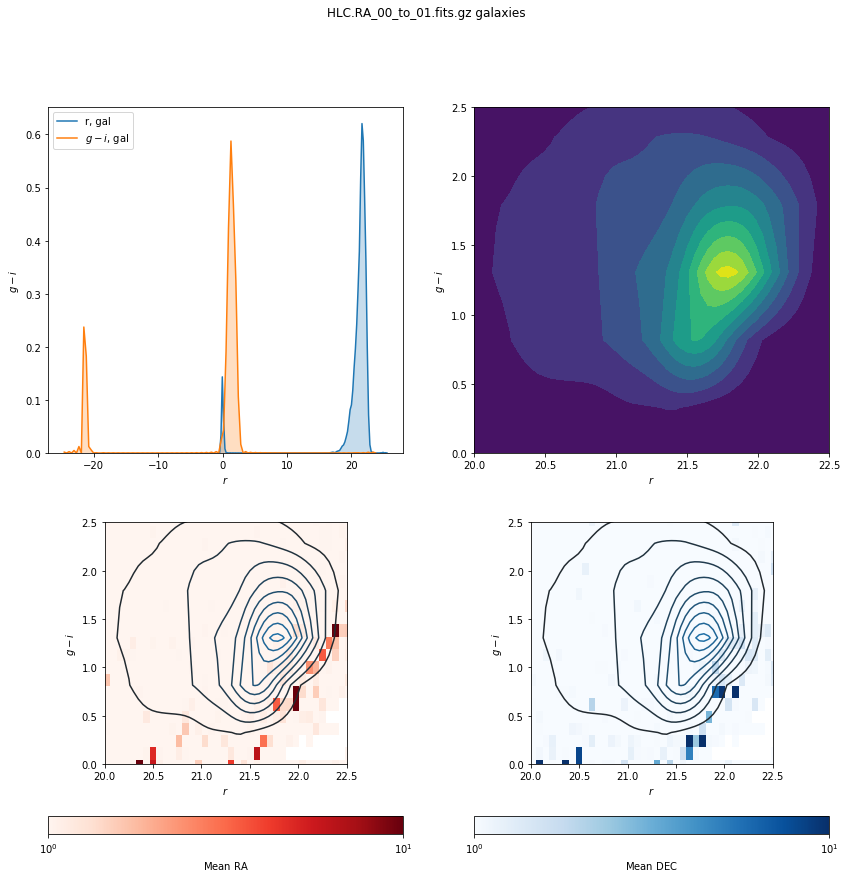

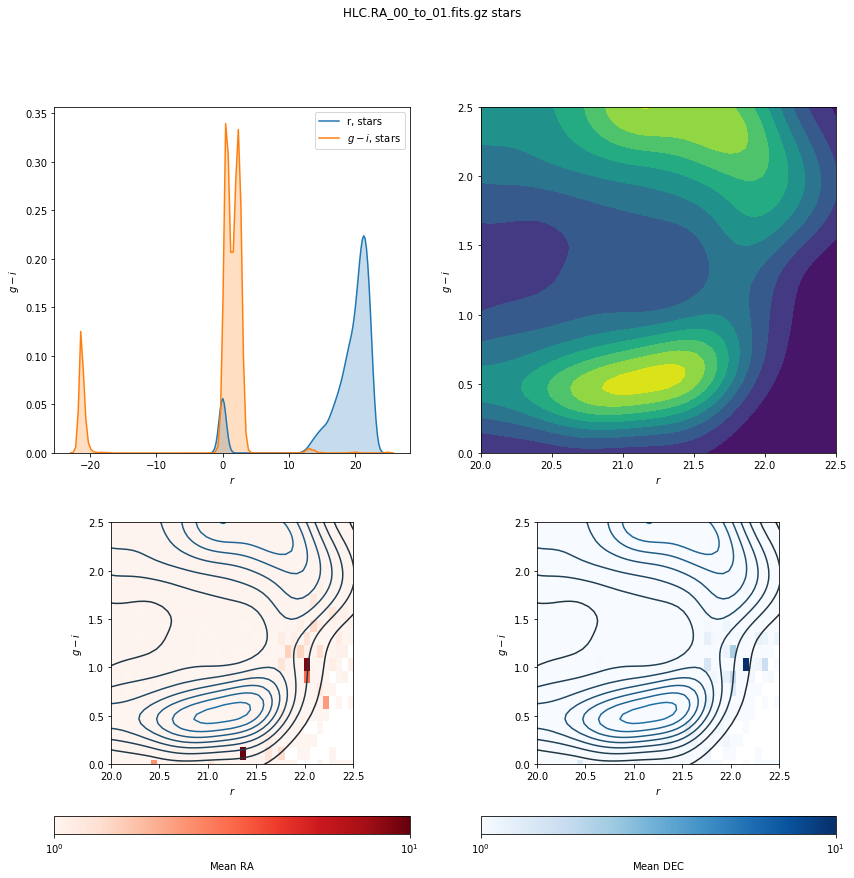

In [109]:
ThreePanelPlotGal(fits0001, "HLC.RA_00_to_01.fits.gz galaxies")
ThreePanelPlotStars(fits0001, "HLC.RA_00_to_01.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

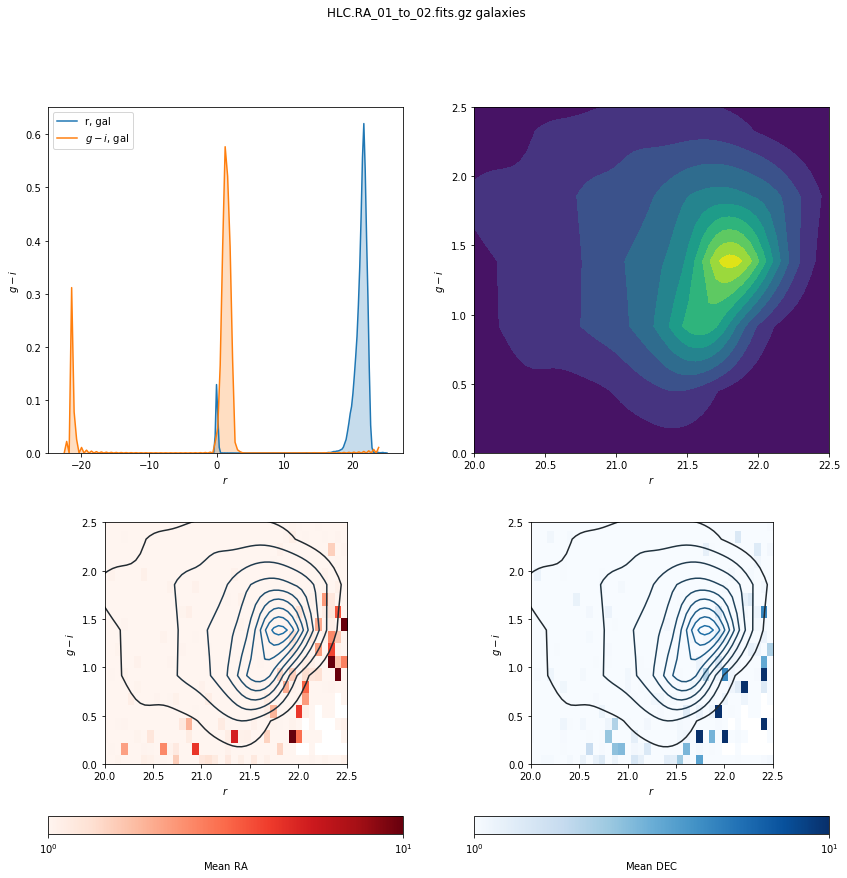

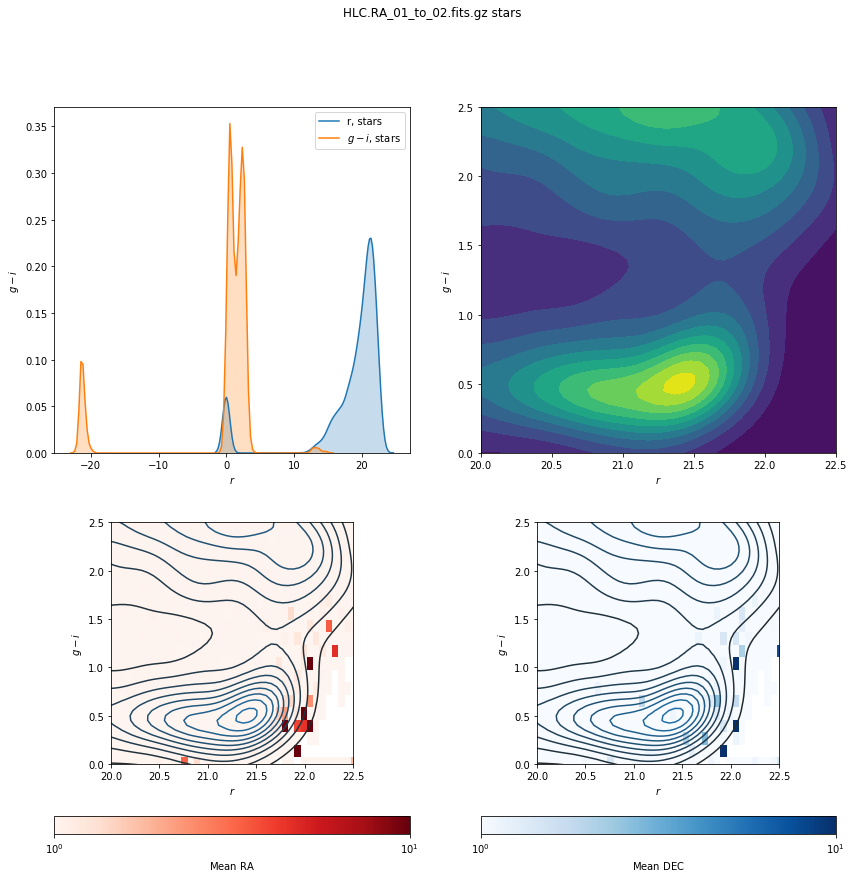

In [110]:
ThreePanelPlotGal(fits0102, "HLC.RA_01_to_02.fits.gz galaxies")
ThreePanelPlotStars(fits0102, "HLC.RA_01_to_02.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

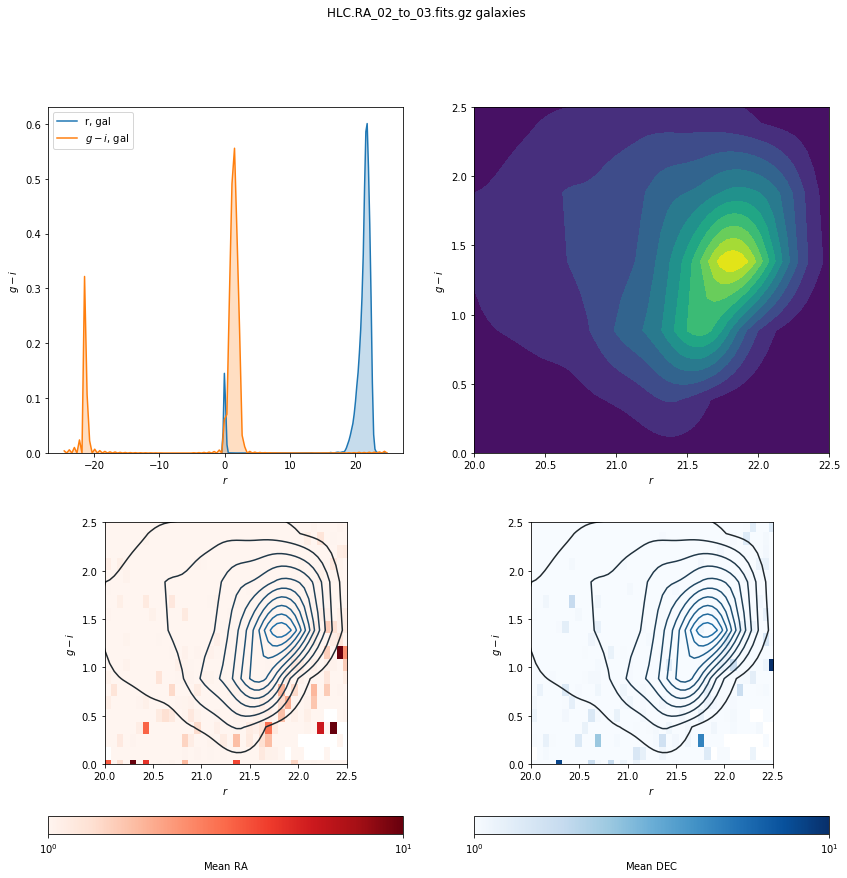

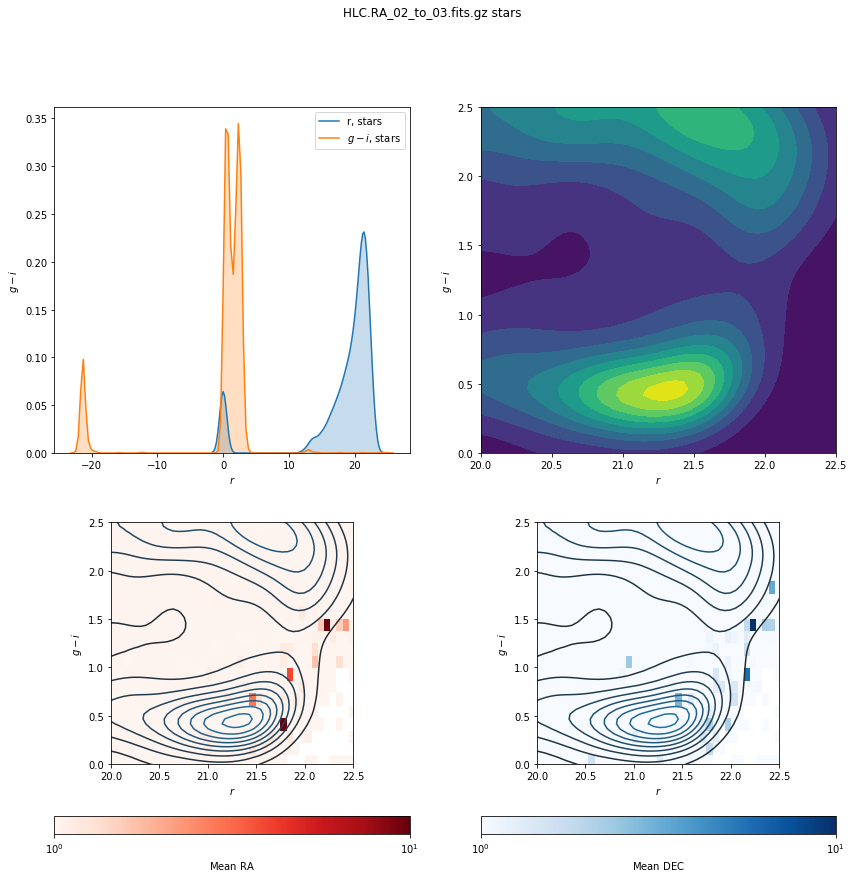

In [111]:
ThreePanelPlotGal(fits0203, "HLC.RA_02_to_03.fits.gz galaxies")
ThreePanelPlotStars(fits0203, "HLC.RA_02_to_03.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

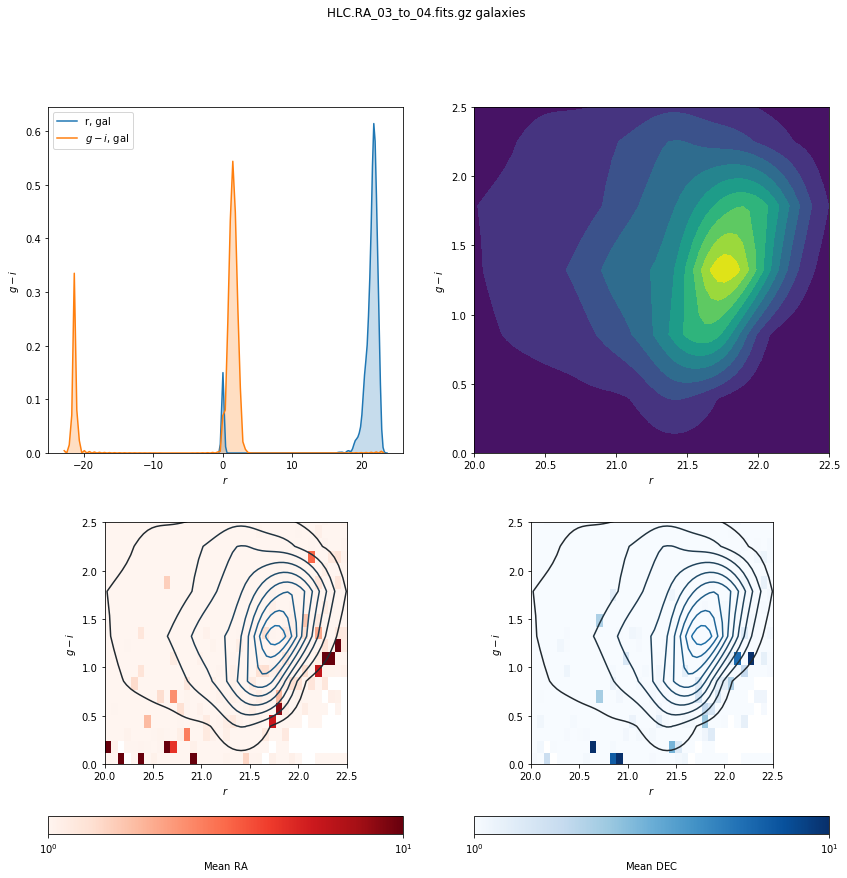

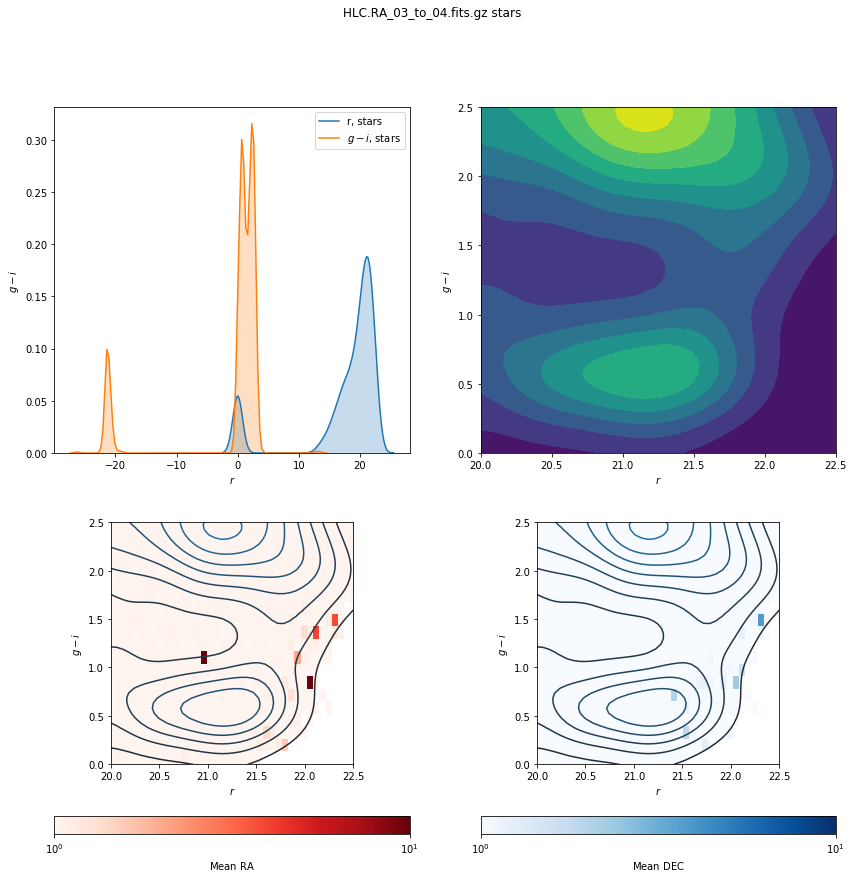

In [112]:
ThreePanelPlotGal(fits0304, "HLC.RA_03_to_04.fits.gz galaxies")
ThreePanelPlotStars(fits0304, "HLC.RA_03_to_04.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

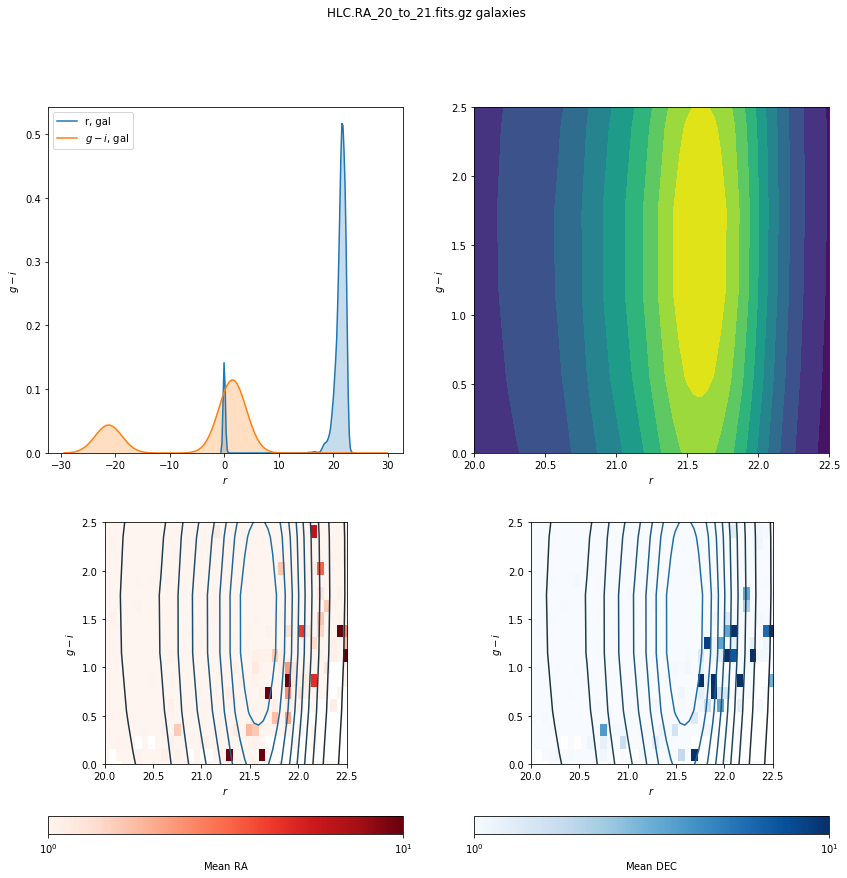

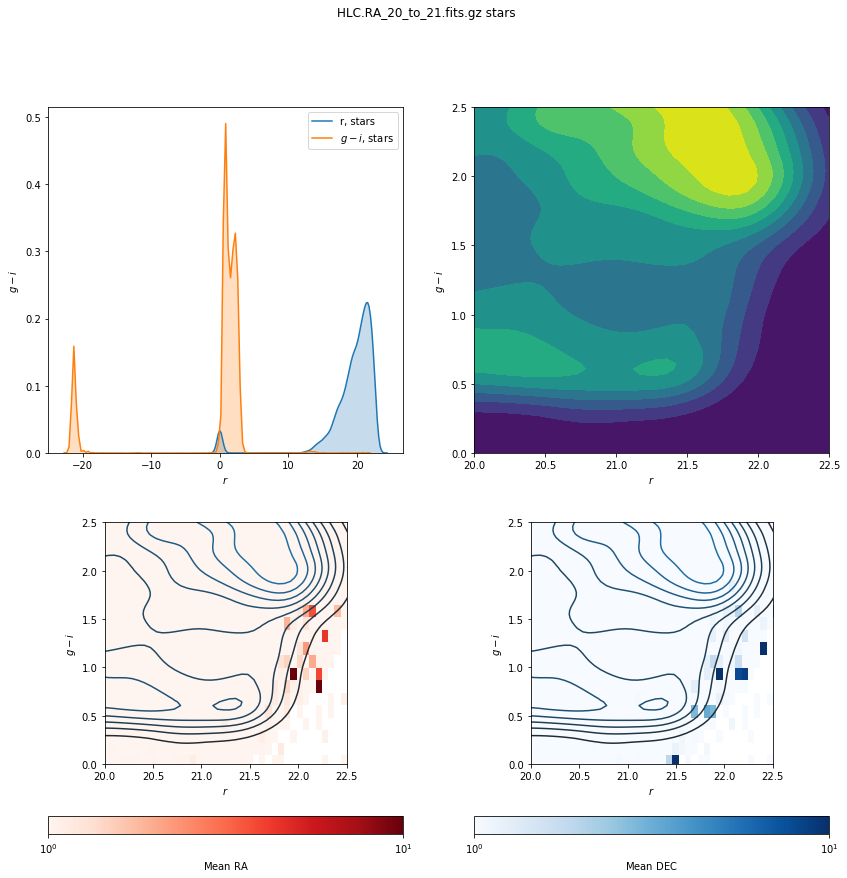

In [119]:
ThreePanelPlotGal(fits2021, "HLC.RA_20_to_21.fits.gz galaxies")
ThreePanelPlotStars(fits2021, "HLC.RA_20_to_21.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

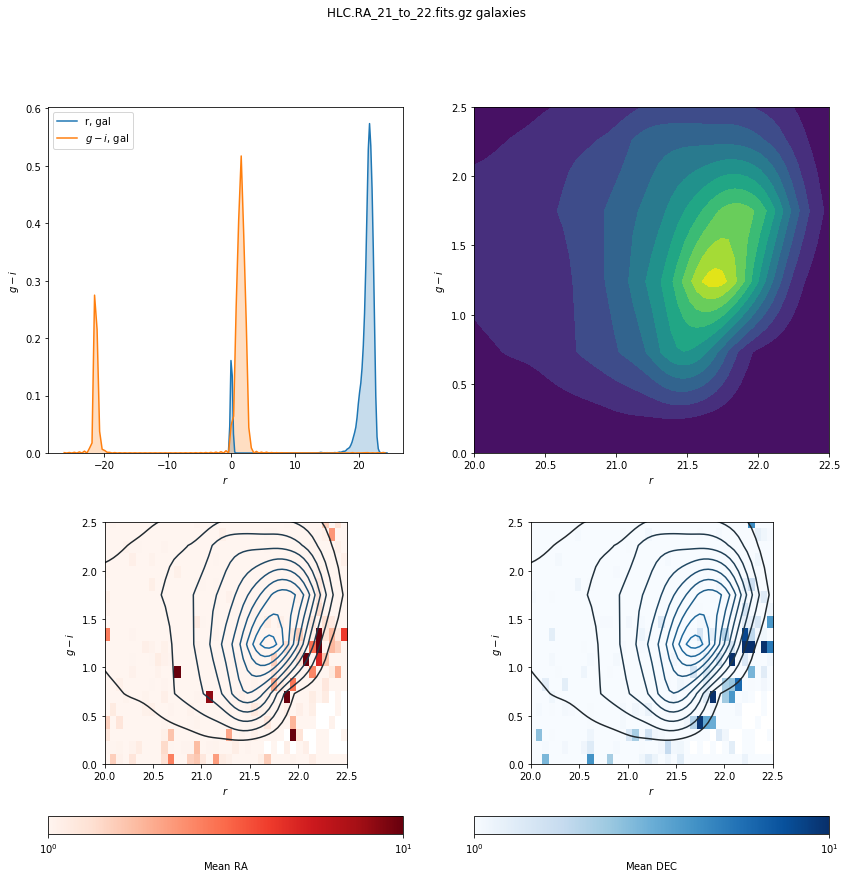

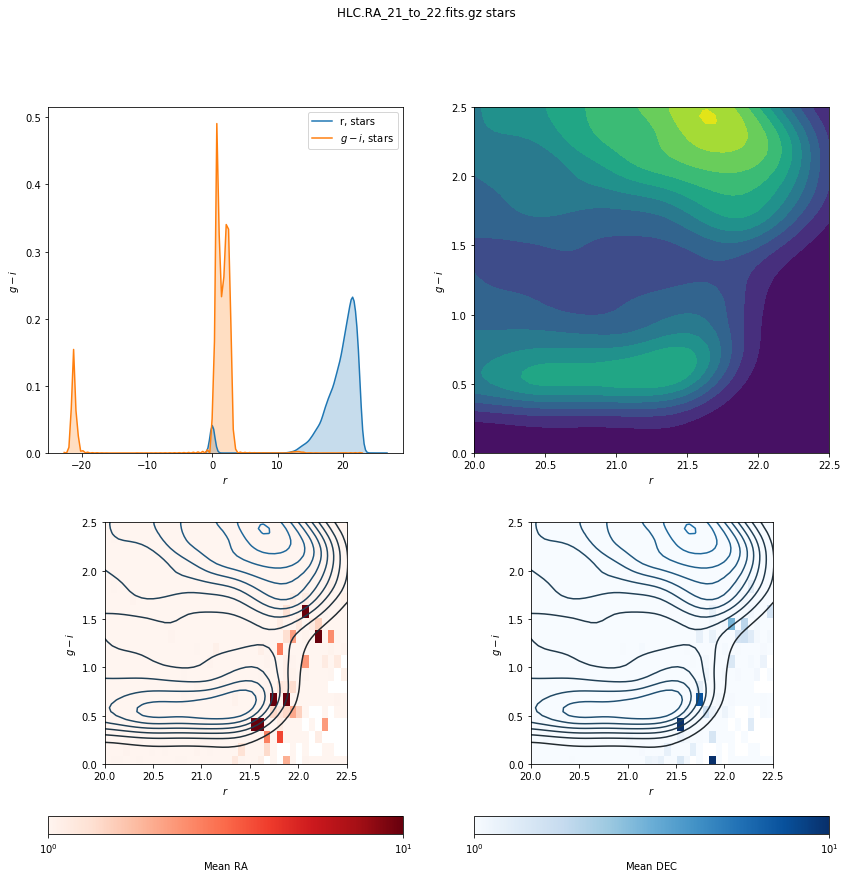

In [120]:
ThreePanelPlotGal(fits2122, "HLC.RA_21_to_22.fits.gz galaxies")
ThreePanelPlotStars(fits2122, "HLC.RA_21_to_22.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

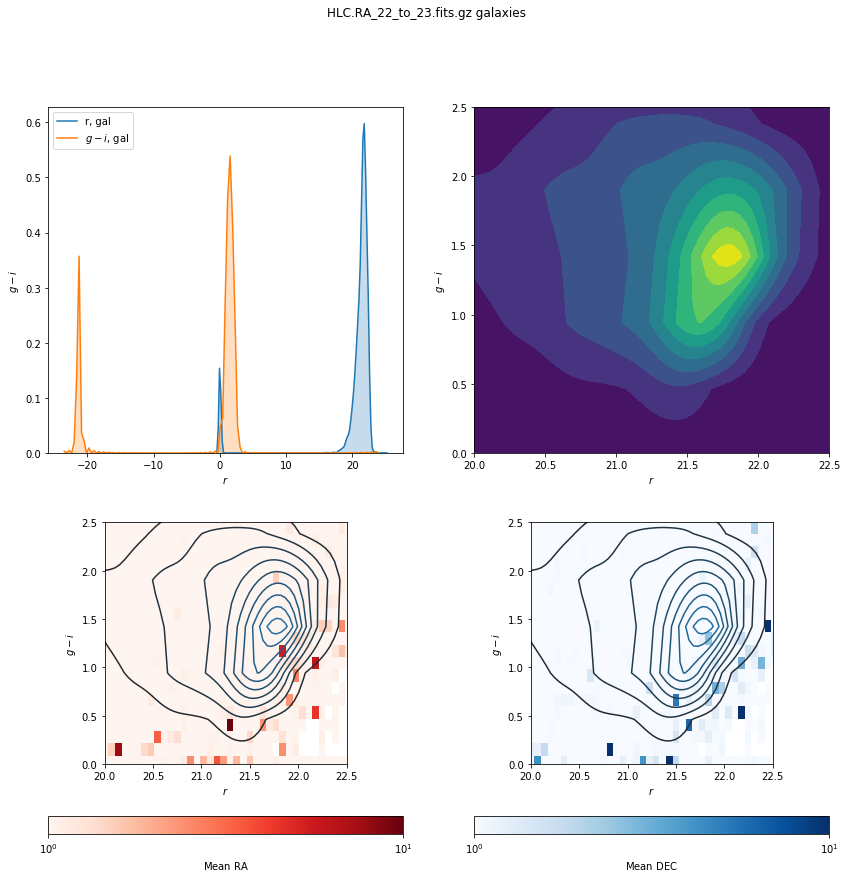

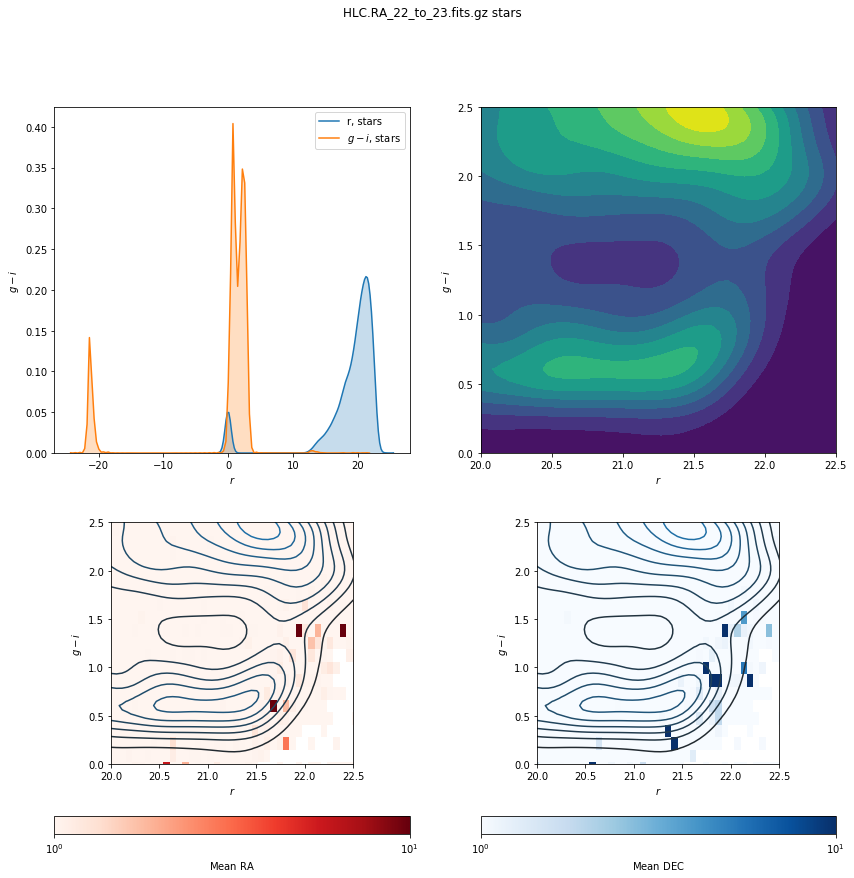

In [121]:
ThreePanelPlotGal(fits2223, "HLC.RA_22_to_23.fits.gz galaxies")
ThreePanelPlotStars(fits2223, "HLC.RA_22_to_23.fits.gz stars")

/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/patrickaleo/miniconda3/envs/fds/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniqu

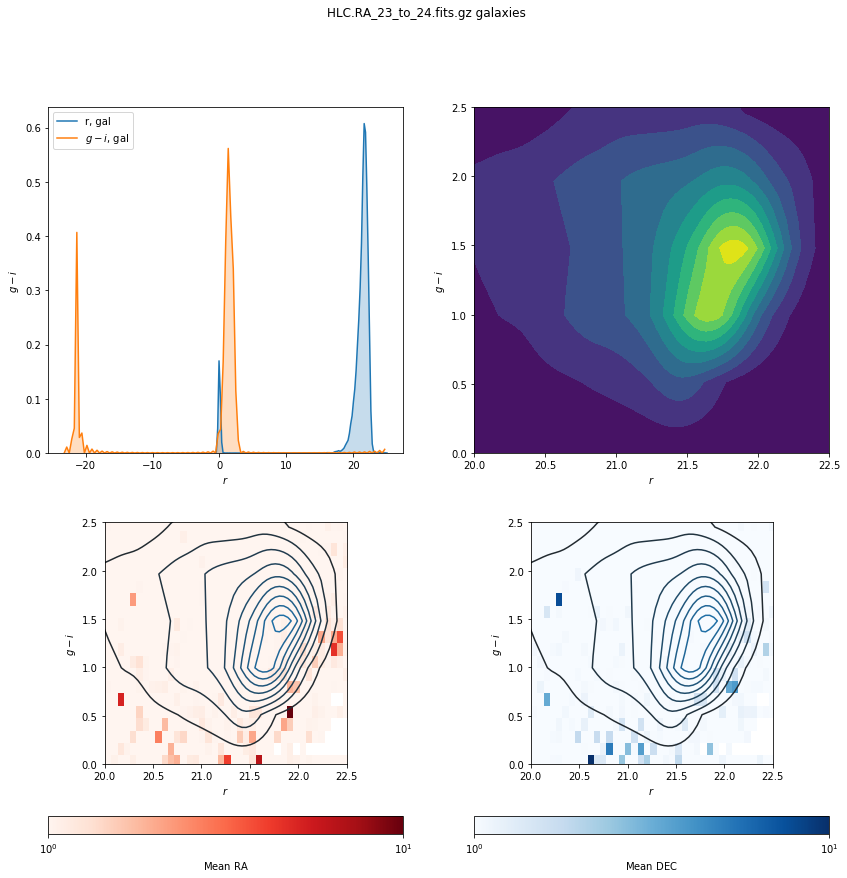

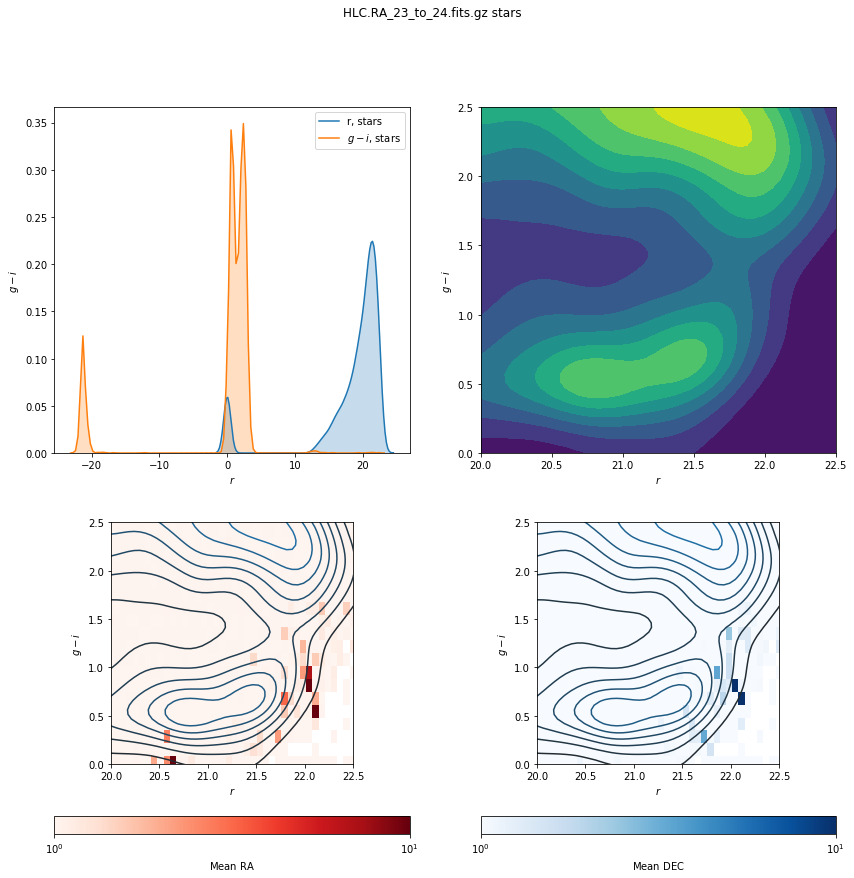

In [122]:
ThreePanelPlotGal(fits2324, "HLC.RA_23_to_24.fits.gz galaxies")
ThreePanelPlotStars(fits2324, "HLC.RA_23_to_24.fits.gz stars")

After plotting all the HLC gal/stars, I can see some main differences over the course of the data files. In general, when plotting the galaxies' univariate distributions, both $r$ and $g-i$ have two peaks. After clipping to $3\sigma$, the main region is single peaked, with the densest region centered about $r=21.75$, $g-i=1.4$. The density contours are more tightly grouped together as $r$ on the right side (that is, increasing in $r$) of this centered peak. Also, in regard to the evolution with position on the sky in each HLC, it seems that the galaxies with higher DEC position values typically have either the highest $r$-band magnitudes, or have low $g-i$ color values (and thus, bluer galaxies), and sometimes, both. The highest DEC galaxies with large $r$-band magnitudes tells me that these are generally more luminous, or are close (or both). 

In general, when plotting the stars' univariate distributions, both $r$ and $g-i$ have two main peaks, but the highest $g-i$ peak is truly *double* peaked! This double peaked nature is evident in the kernel density estimate plot, where one peak is centered roughly ($r$, $g-i$)=(21.5, 2.3), and the other is centered roughly ($r$, $g-i$)=(21.2, 0.5). This tells me there is probably two main populations of stars, potentially some closeby, luminous (high $r$-band mag) and cool(er) stars (as represented by a large $g-i$ color index), and another population of possibly of relatively dimmer, yet hotter stars. Additionally, there seems to be a low density of stars at ($r$, $g-i$)=(21.75, 1.4), which was where the density peak was for the galaxy sample. Lastly, it seems that in general the highest mean RA+DEC stars have high $r$-band mag values and low-mid $g-i$ values. At low RA values on the sky (from the 00-04 files), you see this double peak clearly, but as you get to high RA values on the sky (from the 20-24 files), one of the two peaks is far more smeared out in terms of density contours. This is because we're looking closer/into/near the buldge of the galaxy (with lots of dust and stars), as in the equatorial coordinate system, the galactic center's location is: RA 17h 45m 40.04s, Dec −29° 00′ 28.1″ (J2000 epoch).

# Problem 2: Comparing Apples and Oranges (well, really standard normal distributions)

In [123]:
df = pd.read_csv('../../data/01/IntroStat_demo.csv')
df

,time,mag.hom,mag.outlier,mag.t,mag.het,mag.het.error,mag5,mag5.error
0,0.000000,18.558944,18.530677,18.560527,18.567447,0.067345,18.546056,0.009766
1,0.176158,18.531178,18.551560,18.549906,18.547315,0.017149,18.542605,0.007709
2,0.250165,18.553669,18.468095,18.544618,18.564191,0.020600,18.536269,0.009777
3,1.426983,18.539475,18.537368,18.560818,18.554162,0.074339,18.545782,0.008705
4,1.677148,18.575442,18.790521,18.556126,18.514765,0.027469,18.553644,0.010084
...,...,...,...,...,...,...,...,...
69,10.757089,18.537689,18.571678,18.543100,18.466822,0.045315,18.584009,0.013740
70,10.933247,18.553604,18.554656,18.534926,18.630141,0.072181,18.564123,0.005873
71,11.007254,18.547965,18.553508,18.542977,18.568285,0.087981,18.566357,0.009845
72,11.507584,18.558160,18.558386,18.548952,18.462255,0.087348,18.581563,0.003851


In [124]:
import scipy.stats as st
import statsmodels.api as sm

magOut = df['mag.outlier']
mu = np.mean(magOut)
var = np.var(magOut)
outliers = np.array(magOut)
print('mean is', mu, 'variance is', var, 'sigma is', np.sqrt(var))

mean is 18.561082466856572 variance is 0.005081094393001044 sigma is 0.07128179566341636


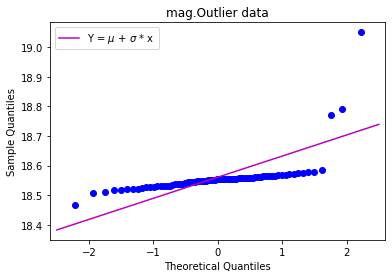

In [125]:
sm.qqplot(magOut)
x = np.linspace(-2.5,2.5,100)
Y = mu + np.sqrt(var)*x
plt.plot(x, Y, color='m', label=r'Y = $\mu$ + $\sigma$ * x')
plt.title('mag.Outlier data')
plt.legend()

In [126]:
magOut.quantile([0.25,0.75]) #get Q1, Q3
#prints quartile | result

0.25    18.537395
0.75    18.562982
Name: mag.outlier, dtype: float64

In [127]:
outliers.sort() #sort list low -> high in ascending order
listOut = list(outliers)
listOut.sort()
print(listOut)

i1 = np.where(np.isclose(listOut, 18.537395)) #where in list close to Q1 value
i2 = np.where(np.isclose(listOut, 18.562982)) #where in list close to Q3 value

print('\nvalues close to Q1:', outliers[i1]) 
print('values close to Q3:', outliers[i2]) 

[18.4680954415675, 18.5067553864728, 18.511224298484603, 18.5184626994895, 18.518722470096396, 18.5195334326354, 18.5199741555534, 18.522141743808, 18.523965847213, 18.526355930414102, 18.5282370595513, 18.5289990734953, 18.529664151435398, 18.530235760623, 18.530606762706398, 18.530677411478898, 18.531988686918602, 18.534449768215, 18.5373682418528, 18.537476364426, 18.5381468484592, 18.5392489410442, 18.5415504934681, 18.5432547797487, 18.5433372839744, 18.544990547003803, 18.5457739476833, 18.5470748575154, 18.5472065305838, 18.548374238575, 18.5484733020366, 18.5496056417444, 18.550513668939303, 18.5515604297523, 18.552456867270102, 18.553111399872602, 18.5535084329554, 18.553915380597, 18.5545087175195, 18.5546561015614, 18.5549543912184, 18.555037029373697, 18.5553861340442, 18.5557037579903, 18.556279430592102, 18.5565164042252, 18.5569551618032, 18.5575914312487, 18.558386306920603, 18.5586263953885, 18.559022834336698, 18.5591448931475, 18.559335965917803, 18.5601414916841, 18

In [128]:
listOut.sort()
i1x = listOut.index(18.5373682418528) #need long numbers from list above to get index
i2x = listOut.index(18.563097285970898)

print('our indices are:', i1x, i2x)
print('our associated (y1, y2) values are:', outliers[i1x], outliers[i2x])

our indices are: 18 55
our associated (y1, y2) values are: 18.5373682418528 18.563097285970898


In [132]:
y2 = outliers[i2x]
y1 = outliers[i1x]
x2 = st.norm.ppf(0.75) #where on Theoretical values is the 75th%
x1 = st.norm.ppf(0.25)
#two point form
y = ((y2-y1)/(x2-x1)) * (x-x1) + y1

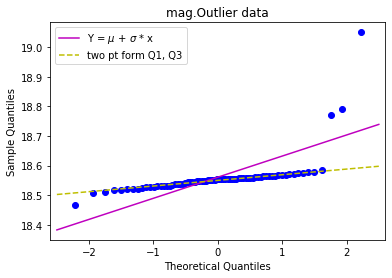

In [133]:
#plot!
sm.qqplot(magOut)
x = np.linspace(-2.5,2.5,100)
Y = mu + np.sqrt(var)*x
plt.plot(x, Y, color='m', label=r'Y = $\mu$ + $\sigma$ * x')
plt.plot(x, y, '--y', label='two pt form Q1, Q3')
plt.title('mag.Outlier data')
plt.legend()

### Repeat with mag.het...

In [134]:
import scipy.stats as st
import statsmodels.api as sm

magHet = df['mag.het']
mu_mH = np.mean(magHet)
var_mH = np.var(magHet)
magHet_array = np.array(magHet)
print('mean is', mu_mH, 'variance is', var_mH, 'sigma is', np.sqrt(var_mH))

mean is 18.54834115592681 variance is 0.002051771742037422 sigma is 0.045296487082746514


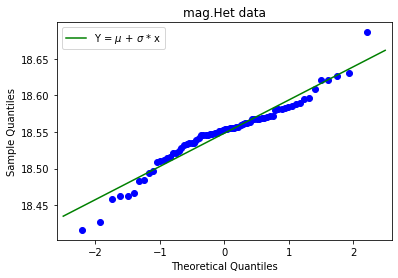

In [135]:
sm.qqplot(magHet)
x_mH = np.linspace(-2.5,2.5,100)
Y_mH = mu_mH + np.sqrt(var_mH)*x_mH
plt.plot(x_mH, Y_mH, color='g', label=r'Y = $\mu$ + $\sigma$ * x')
plt.title('mag.Het data')
plt.legend()

In [136]:
magHet.quantile([0.25,0.75]) #get Q1, Q3
#prints quartile | result

0.25    18.529209
0.75    18.570570
Name: mag.het, dtype: float64

In [137]:
magHet_array.sort() #sort list low -> high in ascending order
listHet = list(magHet_array)
listHet.sort()
print(listHet)

i1_mH = np.where(np.isclose(listHet, 18.528066894758602)) #where in list close to Q1 value
i2_mH = np.where(np.isclose(listHet, 18.5708663214191)) #where in list close to Q3 value

print('\nvalues close to Q1:', magHet_array[i1_mH]) 
print('values close to Q3:', magHet_array[i2_mH]) 

[18.4163400443553, 18.427440890156397, 18.4588274189247, 18.462254659705, 18.463108974821697, 18.466821866146397, 18.4834255226187, 18.484567256063897, 18.4941281286038, 18.4966061176472, 18.5096817311331, 18.5110368266975, 18.511843233363102, 18.5147653876404, 18.5157921009237, 18.520940292734398, 18.5210358782911, 18.524025881666898, 18.528066894758602, 18.5326367831398, 18.533312771630303, 18.535061238233897, 18.535217099833602, 18.5354269120785, 18.5386932314377, 18.5418905128437, 18.545297330534, 18.5458148129442, 18.546036152064396, 18.5463770669773, 18.547315213678697, 18.547843601537, 18.5486975066292, 18.549115232724603, 18.551134499573102, 18.551788246578, 18.552417119136102, 18.554077813842603, 18.5541623997199, 18.5550040797419, 18.5550136968236, 18.5552308890188, 18.5562747021189, 18.5564302249123, 18.559446491345398, 18.561286360916, 18.5621240466992, 18.562862196869897, 18.564190676737898, 18.5674472421206, 18.567686987351802, 18.5677957938898, 18.568285306046604, 18.569

In [138]:
magHet_array.sort()
i1x_mH = listHet.index(18.528066894758602) #need long numbers from list above to get index
i2x_mH = listHet.index(18.5708663214191)

print('our indices are:', i1x_mH, i2x_mH)
print('our associated (y1, y2) values are:', magHet_array[i1x_mH], magHet_array[i2x_mH])

our indices are: 18 55
our associated (y1, y2) values are: 18.528066894758602 18.5708663214191


In [140]:
y2_mH = magHet_array[i2x_mH]
y1_mH = magHet_array[i1x_mH]
x2_mH = st.norm.ppf(0.75)
x1_mH = st.norm.ppf(0.25)
#two point form
y_mH = ((y2_mH-y1_mH)/(x2_mH-x1_mH)) * (x_mH-x1_mH) + y1_mH

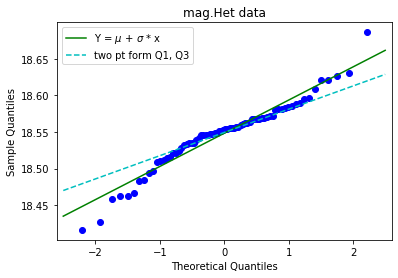

In [141]:
#plot!
sm.qqplot(magHet)
x_mH = np.linspace(-2.5,2.5,100)
Y_mH = mu_mH + np.sqrt(var_mH)*x_mH
plt.plot(x_mH, Y_mH, color='g', label=r'Y = $\mu$ + $\sigma$ * x')
plt.plot(x_mH, y_mH, '--c', label='two pt form Q1, Q3')
plt.title('mag.Het data')
plt.legend()

Here I see that the overplot of the line with Y = $\mu$ + $\sigma$ * x is a pretty good fit to the *mag.Het* data. And because this line is linear, and fits the data well, this tells me that both sets of quantiles likely came from the **same** distribution. In regard to *mag.Outlier*, its overplot of the line with Y = $\mu$ + $\sigma$ * x is a poorer fit, because the outliers on the tails of the sample quantiles skew the data such that the slope of this (magenta) line is greater than the 'slope' of the line formed by the *mag.Outlier* data (the blue dots). In fact, this is done to such an extent it almost runs parallel to the two point form of the line passing through the 1st and 3rd quartiles of the data!

The Q1-Q3 line for *mag.Het* also does not fit exactly to the scatterplot of the data in the Q-Q plot, but it intersects with its Y = $\mu$ + $\sigma$ * x line at a value of Theoretical Quantiles $\approx 0.2$. Because the theoretical quantiles are from the standard Normal distribution with mean 0 and standard deviation 1, this intersection occurs below 1$\sigma$, as opposed to *mag.Outlier* where intersect a value of Theoretical Quantiles $\approx -0.2$. Lastly, the Q1-Q3 line is less sensitive to outliers.

### now to rescale...

In [142]:
magHetErr = df['mag.het.error']
rescale = (magHet - mu_mH)/magHetErr

#statistics
mu_mH_scale = np.mean(rescale)
var_mH_scale = np.var(rescale)
magHet_scale_array = np.array(rescale)
print('mean is', mu_mH_scale, 'variance is', var_mH_scale, 'sigma is', np.sqrt(var_mH_scale))

mean is 0.11479798948895799 variance is 0.8235457747487397 sigma is 0.9074942284933495


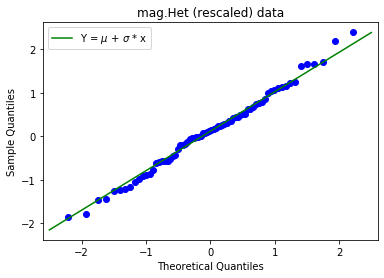

In [143]:
rescale = (magHet - mu_mH)/magHetErr
sm.qqplot(rescale)
x_mH_scale = np.linspace(-2.5,2.5,100)
Y_mH_scale = mu_mH_scale + np.sqrt(var_mH_scale)*x_mH_scale
plt.plot(x_mH_scale, Y_mH_scale, color='g', label=r'Y = $\mu$ + $\sigma$ * x')
plt.title('mag.Het (rescaled) data')
plt.legend()

In [144]:
rescale.quantile([0.25,0.75]) #get Q1, Q3
#prints quartile | result

0.25   -0.551013
0.75    0.657301
dtype: float64

In [145]:
magHet_scale_array.sort() #sort list low -> high in ascending order
listHet_scale = list(magHet_scale_array)
listHet_scale.sort()
print(listHet_scale)

i1_mH_scale = np.where(np.isclose(listHet_scale, -0.5598454400639558)) #where in list close to Q1 value
i2_mH_scale = np.where(np.isclose(listHet_scale, 0.6662393327778102)) #where in list close to Q3 value

print('\nvalues close to Q1:', magHet_scale_array[i1_mH_scale]) 
print('values close to Q3:', magHet_scale_array[i2_mH_scale]) 

[-1.850762539309414, -1.7989570886719066, -1.4775251962232487, -1.4323222645557037, -1.2591340778510312, -1.2401577052806572, -1.2223163577440275, -1.1743875280564953, -1.0592497047968212, -0.9855586865715089, -0.9186246151518368, -0.8801697606913103, -0.8670248354233923, -0.7691593401419534, -0.6123332048209675, -0.5929306063596493, -0.5745563060667767, -0.5666705735323454, -0.5598454400639558, -0.5245140349514734, -0.4527183056618638, -0.4346203414876139, -0.29209572177284937, -0.19643021228350746, -0.19571910452294636, -0.1888192192298065, -0.13754099153031926, -0.059826706259685516, -0.05090111085131211, -0.037041517018174305, -0.028462750243617493, -0.00980344888198588, 0.004601677368450167, 0.0783069975985983, 0.08160362678560924, 0.10037594893483208, 0.10867765309210319, 0.14379444198389593, 0.15666076779988386, 0.18438828336168975, 0.2266864465888788, 0.24469162215771287, 0.2623629921921479, 0.2837055835357609, 0.30336505580070183, 0.34611750435077354, 0.3544985921730066, 0.428

In [146]:
magHet_scale_array.sort()
i1x_mH_scale = listHet_scale.index(-0.5598454400639558) #need long numbers from list above to get index
i2x_mH_scale = listHet_scale.index(0.6662393327778102)

print('our indices are:', i1x_mH_scale, i2x_mH_scale)
print('our associated (y1, y2) values are:',
      magHet_scale_array[i1x_mH_scale], magHet_scale_array[i2x_mH_scale])

our indices are: 18 55
our associated (y1, y2) values are: -0.5598454400639558 0.6662393327778102


In [147]:
y2_mH_scale = magHet_scale_array[i2x_mH_scale]
y1_mH_scale = magHet_scale_array[i1x_mH_scale]
x2_mH_scale = st.norm.ppf(0.75)
x1_mH_scale = st.norm.ppf(0.25)
#two point form
y_mH_scale = ((y2_mH_scale-y1_mH_scale)/(x2_mH_scale-x1_mH_scale)) * (x_mH_scale-x1_mH_scale) + y1_mH_scale

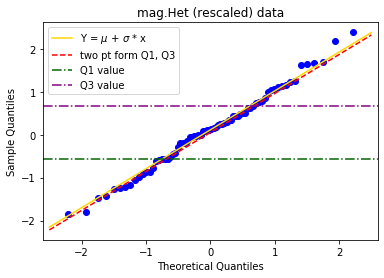

In [148]:
#plot!
sm.qqplot(rescale)
x_mH_scale = np.linspace(-2.5,2.5,100)
Y_mH_scale = mu_mH_scale + np.sqrt(var_mH_scale)*x_mH_scale
plt.plot(x_mH_scale, Y_mH_scale, color='gold', label=r'Y = $\mu$ + $\sigma$ * x')
plt.plot(x_mH_scale, y_mH_scale, '--r', label='two pt form Q1, Q3')
plt.axhline(-0.5598454400639558, ls='-.', color='darkgreen', label='Q1 value')
plt.axhline(0.6662393327778102, ls='-.', color='purple', label='Q3 value')
plt.title('mag.Het (rescaled) data')
plt.legend()

In this rescaled schema, we can see that the form of the line Y = $\mu$ + $\sigma$ * x  is an excellent fit to the *mag.Het (rescaled)* scatterplot quantiles data. This is because in a rescaled case, the few points on the tails have regressed more to the mean than before, and make a tighter linear fit. This reinforces that these two quantiles are drawn from the same distribution :)

The Q1-Q3 runs almost, if not, exactly parallel to the line Y = $\mu$ + $\sigma$ * x at all Theoretical Quantiles. Here I added in horizonal lines distinguishing the indivdual Q1 and Q3 values, so we can see that indeed these values are the quartile values, and that they contain the ranges of data we expect them to. The biggest difference between the rescaled plot and the non scaled plot is how well the line Y = $\mu$ + $\sigma$ * x matches the *mag.Het* data, with the rescaled matching it exactly (by eye).

# Problem 3: Wesenheit index

In [149]:
ceph = pd.read_csv('../../data/01/Cepheids.csv')
ceph

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.819330,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.734970,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.214420,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.646310,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.688390,F,LMC,14.34215,0.565524,0.647
...,...,...,...,...,...,...,...,...
7264,OGLE-SMC-CEP-4622,1.404808,-73.269361,1,SMC,15.94460,0.141140,0.648
7265,OGLE-SMC-CEP-4624,1.406767,-74.192639,1,SMC,15.29565,0.102449,0.577
7266,OGLE-SMC-CEP-4625,1.407181,-72.936056,1,SMC,15.33725,0.074740,0.485
7267,OGLE-SMC-CEP-4627,1.413575,-72.599167,1,SMC,14.06670,0.501477,0.686


In [150]:
# Split the data into LMC and SMC, and then again by mode F and 1

# cloud threshold
LMC = ceph[ceph['Cloud'] == 'LMC']
SMC = ceph[ceph['Cloud'] == 'SMC']

# mode threshold
#LMC
LMC_F = LMC[LMC['Mode'] == 'F']
LMC_1 = LMC[LMC['Mode'] == '1']
#SMC
SMC_F = SMC[SMC['Mode'] == 'F']
SMC_1 = SMC[SMC['Mode'] == '1']

### LMC-F Plots

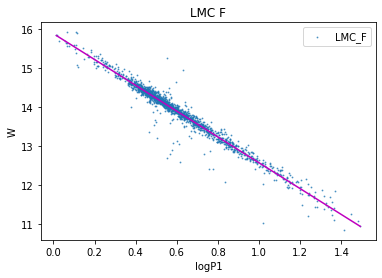

In [151]:
plt.scatter(x=LMC_F['logP1'], y=LMC_F['W'], alpha=0.7, s=0.7, label='LMC_F')
plt.plot(np.unique(LMC_F['logP1']), np.poly1d(np.polyfit(LMC_F['logP1'], 
                    LMC_F['W'], 1))(np.unique(LMC_F['logP1'])), 'm-')
#plot accents
plt.ylabel('W')
plt.xlabel('logP1')
plt.title('LMC F')
plt.legend()

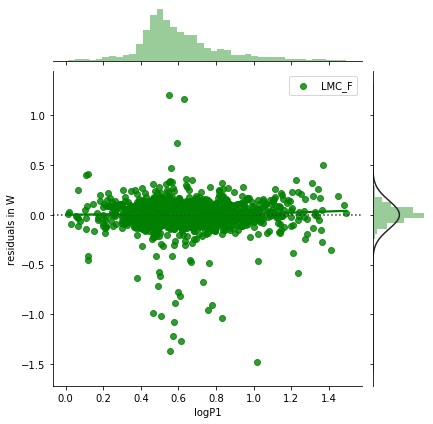

In [337]:
# Plot the residuals after fitting a linear model
sns.jointplot(x=LMC_F['logP1'], y=LMC_F['W'], kind="resid", 
              lowess=True, color="g", label='LMC_F')
plt.ylabel('residuals in W')
plt.legend()

The residuals in W do not look like a normal distribution! There are many more residuals in W peaked at 0 than expected for a normal distribution, while also lacking in the tails- where it falls off quicker than one would expect for a normal distribution. This is because Cepheids are a "standard candle" whereby there is a very direct association between period and luminosity, and from that we can extract their distance; for Cepheids, the greater (longer) the period, the brighter its luminosity. And so, nearby we can measure all sorts of Cepheids, but we can only see the ones furthest away if they are extremely luminous and have a long period. If not, their far distance and low(er) luminosity disfavors us from observing them. 

This is true for all modes, and for both LMC/SMC.

Text(0.5, 0, '$W$')

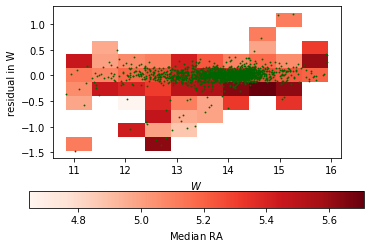

In [334]:
yp = np.poly1d(np.polyfit(LMC_F['logP1'], LMC_F['W'], 1))

resid_w = LMC_F['W'] - yp(LMC_F['logP1'])
                    
from astroML.stats import binned_statistic_2d
RA_median, xedges, yedges = binned_statistic_2d(LMC_F['W'], resid_w, LMC_F['RA0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(RA_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(LMC_F['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

Text(0.5, 0, '$W$')

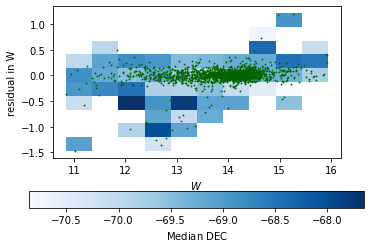

In [336]:
yp = np.poly1d(np.polyfit(LMC_F['logP1'], LMC_F['W'], 1))

resid_w = LMC_F['W'] - yp(LMC_F['logP1'])
                    
from astroML.stats import binned_statistic_2d
DEC_median, xedges, yedges = binned_statistic_2d(LMC_F['W'], resid_w, LMC_F['Decl0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(DEC_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{DEC}$')
###
plt.scatter(LMC_F['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

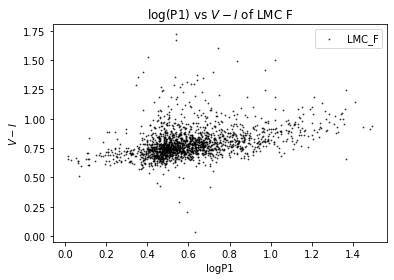

In [100]:
# just to anticipate the next homework assignment, also plot log(P1) vs V-I. 
plt.scatter(x=LMC_F['logP1'], y=LMC_F['VI'], label='LMC_F', s=0.7, color='k', alpha=0.7)
plt.xlabel('logP1')
plt.ylabel(r'$V-I$')
plt.title(r'log(P1) vs $V-I$ of LMC F')
plt.legend()

The larger the color index ($V-I$), the more "red" and cooler the Cepheid is, and vice versa. And so, from this plot it appears that in general there seems to be a correlation between period and color: the longer the period, the cooler the Cepheid. And, because we know longer period Cepheids and the brighter ones, this implies that the brighter ones are cooler. However, we must keep in mind that both V and I are sensitive to extinction.

### LMC-1 Plots

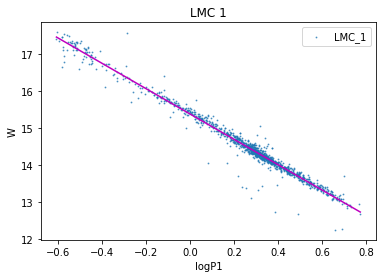

In [101]:
plt.scatter(x=LMC_1['logP1'], y=LMC_1['W'], alpha=0.7, s=0.7, label='LMC_1')
plt.plot(np.unique(LMC_1['logP1']), np.poly1d(np.polyfit(LMC_1['logP1'], 
                    LMC_1['W'], 1))(np.unique(LMC_1['logP1'])), 'm-')
#plot accents
plt.ylabel('W')
plt.xlabel('logP1')
plt.title('LMC 1')
plt.legend()

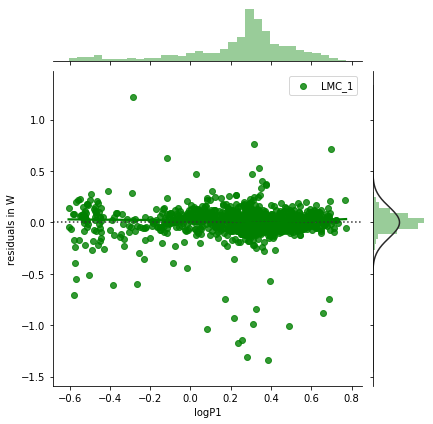

In [339]:
sns.jointplot(x=LMC_1['logP1'], y=LMC_1['W'], kind="resid", 
              lowess=True, color="g", label='LMC_1')
plt.ylabel('residuals in W')
plt.legend()

Text(0.5, 0, '$W$')

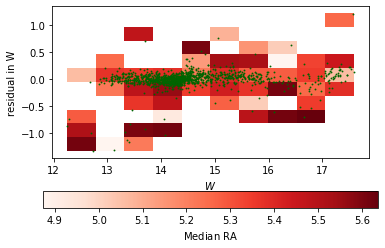

In [340]:
yp = np.poly1d(np.polyfit(LMC_1['logP1'], LMC_1['W'], 1))

resid_w = LMC_1['W'] - yp(LMC_1['logP1'])
                    
from astroML.stats import binned_statistic_2d
RA_median, xedges, yedges = binned_statistic_2d(LMC_1['W'], resid_w, LMC_1['RA0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(RA_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(LMC_1['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

Text(0.5, 0, '$W$')

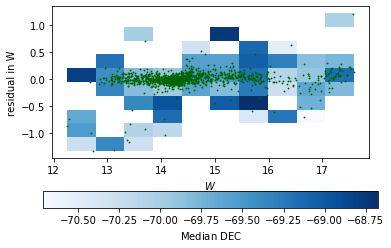

In [341]:
yp = np.poly1d(np.polyfit(LMC_1['logP1'], LMC_1['W'], 1))

resid_w = LMC_1['W'] - yp(LMC_1['logP1'])
                    
from astroML.stats import binned_statistic_2d
DEC_median, xedges, yedges = binned_statistic_2d(LMC_1['W'], resid_w, LMC_1['Decl0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(DEC_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{DEC}$')
###
plt.scatter(LMC_1['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

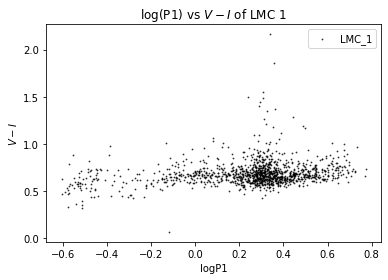

In [306]:
# just to anticipate the next homework assignment, also plot log(P1) vs V-I. 
plt.scatter(x=LMC_1['logP1'], y=LMC_1['VI'], label='LMC_1', s=0.7, color='k', alpha=0.7)
plt.xlabel('logP1')
plt.ylabel(r'$V-I$')
plt.title(r'log(P1) vs $V-I$ of LMC 1')
plt.legend()

### SMC-F Plots

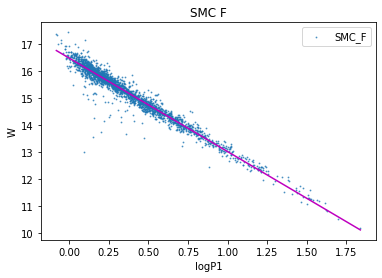

In [103]:
plt.scatter(x=SMC_F['logP1'], y=SMC_F['W'], alpha=0.7, s=0.7, label='SMC_F')
plt.plot(np.unique(SMC_F['logP1']), np.poly1d(np.polyfit(SMC_F['logP1'], 
                    SMC_F['W'], 1))(np.unique(SMC_F['logP1'])), 'm-')
#plot accents
plt.ylabel('W')
plt.xlabel('logP1')
plt.title('SMC F')
plt.legend()

In general, for any given logP1 value, we can see that the "F" modes have a slightly lower W value in both SMC/LMC as opposed to the "1" modes.

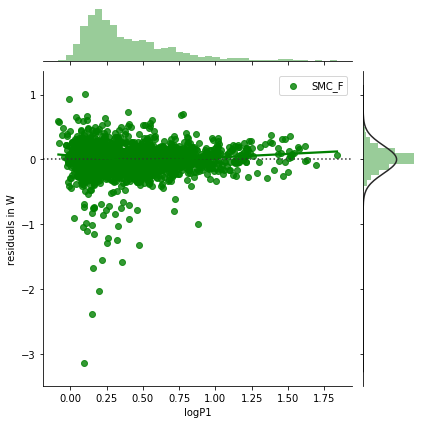

In [342]:
# Plot the residuals after fitting a linear model
sns.jointplot(x=SMC_F['logP1'], y=SMC_F['W'], kind="resid", 
              lowess=True, color="g", label='SMC_F')
plt.ylabel('residuals in W')
plt.legend()

This particular plot has lower residuals in W, which is also the case for the next SMC plot.

Text(0.5, 0, '$W$')

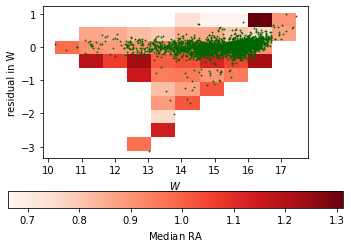

In [343]:
yp = np.poly1d(np.polyfit(SMC_F['logP1'], SMC_F['W'], 1))

resid_w = SMC_F['W'] - yp(SMC_F['logP1'])
                    
from astroML.stats import binned_statistic_2d
RA_median, xedges, yedges = binned_statistic_2d(SMC_F['W'], resid_w, SMC_F['RA0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(RA_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(SMC_F['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

Text(0.5, 0, '$W$')

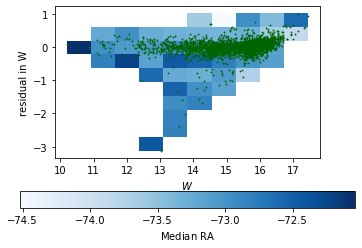

In [344]:
yp = np.poly1d(np.polyfit(SMC_F['logP1'], SMC_F['W'], 1))

resid_w = SMC_F['W'] - yp(SMC_F['logP1'])
                    
from astroML.stats import binned_statistic_2d
DEC_median, xedges, yedges = binned_statistic_2d(SMC_F['W'], resid_w, SMC_F['Decl0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(DEC_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(SMC_F['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

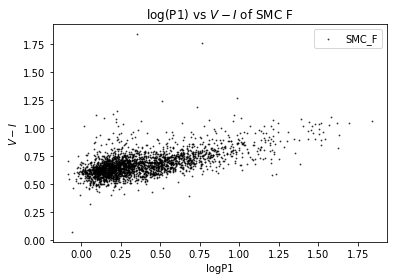

In [105]:
# just to anticipate the next homework assignment, also plot log(P1) vs V-I. 
plt.scatter(x=SMC_F['logP1'], y=SMC_F['VI'], label='SMC_F', s=0.7, color='k', alpha=0.7)
plt.xlabel('logP1')
plt.ylabel(r'$V-I$')
plt.title(r'log(P1) vs $V-I$ of SMC F')
plt.legend()

### SMC-1 Plots

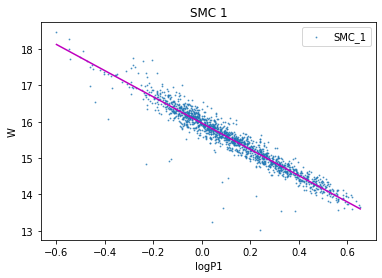

In [106]:
plt.scatter(x=SMC_1['logP1'], y=SMC_1['W'], alpha=0.7, s=0.7, label='SMC_1')
plt.plot(np.unique(SMC_1['logP1']), np.poly1d(np.polyfit(SMC_1['logP1'], 
                    SMC_1['W'], 1))(np.unique(SMC_1['logP1'])), 'm-')
#plot accents
plt.ylabel('W')
plt.xlabel('logP1')
plt.title('SMC 1')
plt.legend()

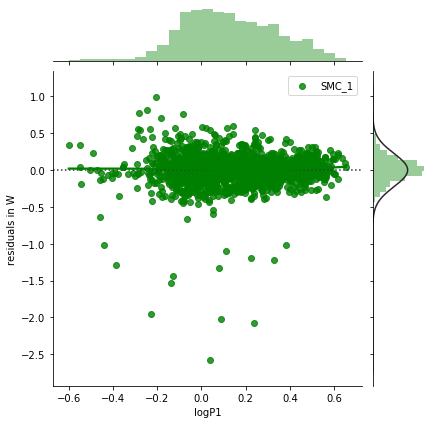

In [345]:
# Plot the residuals after fitting a linear model
sns.jointplot(x=SMC_1['logP1'], y=SMC_1['W'], kind="resid", 
              lowess=True, color="g", label='SMC_1')
plt.ylabel('residuals in W')
plt.legend()

Text(0.5, 0, '$W$')

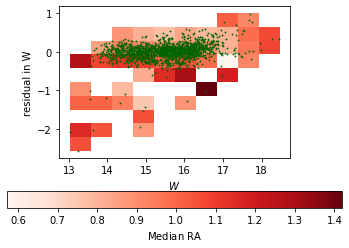

In [346]:
yp = np.poly1d(np.polyfit(SMC_1['logP1'], SMC_1['W'], 1))

resid_w = SMC_1['W'] - yp(SMC_1['logP1'])
                    
from astroML.stats import binned_statistic_2d
RA_median, xedges, yedges = binned_statistic_2d(SMC_1['W'], resid_w, SMC_1['RA0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(RA_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_RA)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(SMC_1['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

Text(0.5, 0, '$W$')

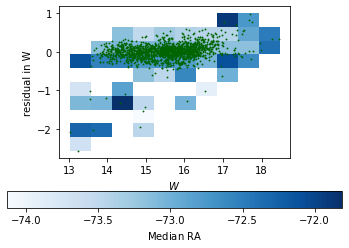

In [347]:
yp = np.poly1d(np.polyfit(SMC_1['logP1'], SMC_1['W'], 1))

resid_w = SMC_1['W'] - yp(SMC_1['logP1'])
                    
from astroML.stats import binned_statistic_2d
DEC_median, xedges, yedges = binned_statistic_2d(SMC_1['W'], resid_w, SMC_1['Decl0'],
                                              'median', bins=10)

# Define custom colormaps: Set pixels with no sources to white
cmap_RA = plt.cm.Reds
cmap_RA.set_bad('w', 1.)

cmap_DEC = plt.cm.Blues
cmap_DEC.set_bad('w', 1.)
                          
plt.imshow(DEC_median.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal', interpolation='nearest', cmap=cmap_DEC)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Median $\mathrm{RA}$')
###
plt.scatter(SMC_1['W'], resid_w, color='darkgreen', s=0.7)
plt.ylabel('residual in W')
plt.xlabel('$W$')

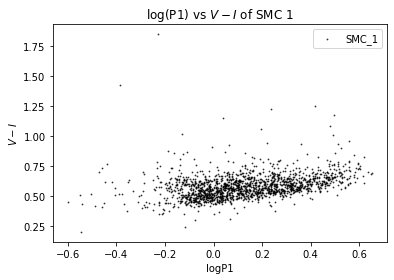

In [108]:
# just to anticipate the next homework assignment, also plot log(P1) vs V-I. 
plt.scatter(x=SMC_1['logP1'], y=SMC_1['VI'], label='SMC_1', color='k', s=0.7, alpha=0.7)
plt.xlabel('logP1')
plt.ylabel(r'$V-I$')
plt.title(r'log(P1) vs $V-I$ of SMC 1')
plt.legend()

The "1" mode plots have more of its stars on the higher logP1 end than the "F" mode ones.

In [ ]:
# I apologize for my at times awful coding skills. 
# It will get better as I code smarter, not harder...i.e. use 
# more functions and less repeating my same code!